# Statistics and Monte Carlo Integration

In this lecture we will review the basics of statistics and perform some Monte Carlo integration. The goal is to lay the foundation for doing various statistical mechanics and quantum mechanics problems on a computer.

# Drawing Random Numbers: Uniform Distribution

``Random" numbers on a computer are generated by *pseudo* random number generators (PRNGs). For the most part we won't worry about this in this class, but I should say it once. For instance, the algorithm below is one way to draw pseudo-random uniform numbers. Some particular values denote the "RANDU" algorithm, which is a particularly bad PRNG, as discussed in the [Wikipedia article](https://en.wikipedia.org/wiki/RANDU).

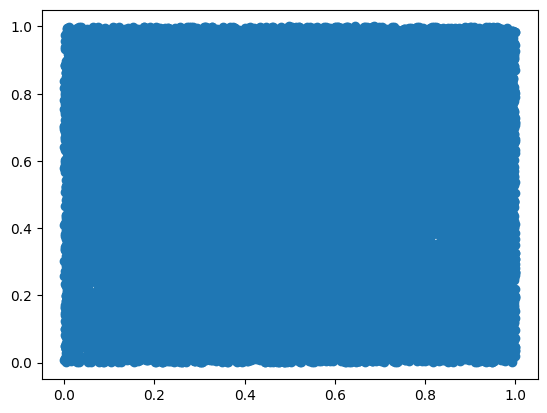

In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 50002
r = np.zeros(N+1)
# This is my arbitrary pick (large, and *probably* primes -- haven't checked)
bigint = 6537169170218971
coef = 52361276312121

# This the infamous RANDU
#coef = 65539
#bigint = 2**31

#coef = 112
#bigint=2555

seed = 1.
r[0] = seed
for i in range(1,N+1):
    r[i] = (coef*r[i-1])%bigint
        
r1 = np.zeros(N//2)
r2 = np.zeros(N//2)
for i in range(0,N,2):
    r1[i//2] = float(r[i])/float(bigint)
    r2[i//2] = float(r[i+1])/float(bigint)
    
pyplot.plot(r1,r2,marker='o',linestyle='None');
    

Non-uniform random distributions
--------------------------------

In the previous section we learned how to generate random deviates with
a uniform probability distribution in an interval $[a,b]$. This
distributioon is normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence,
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y),$$ 
where F(y) is known as the cumulative distribution function (CDF).

Therefore,
$$y(x)=F^{-1}(x),
$$ where $F^{-1}$ is the inverse of $F$.

### Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$P(y)=\frac{dx}{dy}=e^{-y},$
which is distributed exponentially. 

To figure out the relevant transformation, we compute the CDF 
$$x=F(y)=\int _0^y {e^{-y'}dy'}=1-e^{-y}.$$
Solving for $y$ in terms of $x$, we have 
$$y=-\ln{(1-x)}.$$
This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.



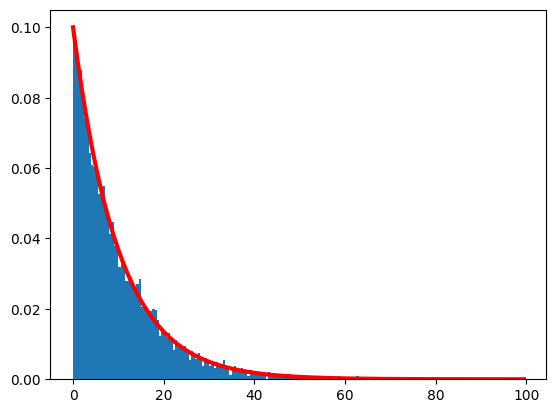

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
r = np.random.random(N)

xlambda = 0.1
x = -np.log(1-r)/xlambda

binwidth=xlambda*5
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

You can get Gaussian random variables by the so-called Box-Muller transform. We'll demonstrate that it *works*, but for a thorough introduction read here: [Box-Muller Wikipedia](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform).

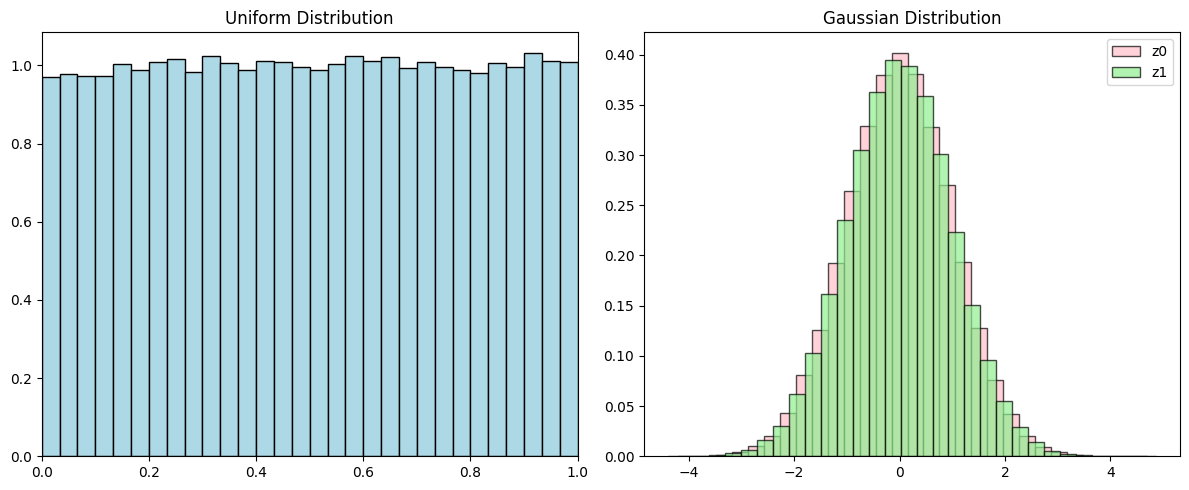

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller(u1, u2):
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z0, z1

# Generate two uniform random variables
u1 = np.random.rand(100000)
u2 = np.random.rand(100000)

z0, z1 = box_muller(u1, u2)

# Plotting

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting Uniform Distribution
axs[0].hist(u1, bins=30, density=True, color='lightblue', edgecolor='black')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlim([0, 1])

# Plotting Gaussian Distribution using Box-Muller Transform
axs[1].hist(z0, bins=30, density=True, alpha=0.7, color='pink', edgecolor='black', label='z0')
axs[1].hist(z1, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black', label='z1')
axs[1].set_title('Gaussian Distribution')
axs[1].legend()

plt.tight_layout()
plt.show()


von Neumann rejection sampling
------------------------------

Rejection sampling was invented by von Neumann in 1951. It is a simple
and general method for generating arbitrary distributions. The idea is
to sample uniformly from a region known to enclose the distribution of
interest, and to reject any samples that lie outside the region.

To do rejection sampling, draw a plot
with you probability distribution, and on the same graph, plot another
curve $f(x)$ which has finite area and lies everywhere above your
original distribution. We will call $f(x)$ the “comparison function”.
Generate random pairs $(x_i,y_i)$ with uniform distribution inside
$f(x)$. Whenever the point lies inside the area of the original
probability, we accept it, otherwise, we reject it. All the accepted
points will be uniformly distributed within the original area, and
therefore will have the desired distribution. The fraction of points
accepted/rejected will deppend on the ratio between the two areas. The
closer the comparison function $f(x)$ resembles $P(x)$, the more points
will be accepted. Ideally, for $P(x)=f(x)$, all the points will be
accepted, and none rejected. However, in practice, this is not always
possible, but we can try to pick $f(x)$ such that we minimize the
fraction of rejected points.

You know a version of this from your first homework: you computed $\pi$ by
drawing random points in a square between $0$ and $1$ and counting how many were inside a
circle. The circle is the region enclosing the distribution of interest, the uniform density on the circle, and the square is the region from which you can easily draw, as shown above. By rejection sampling, you computed the volume of the circle relative to the volume of the square. That ratio is $\pi/4$.

Acceptance Ratio:  0.16756


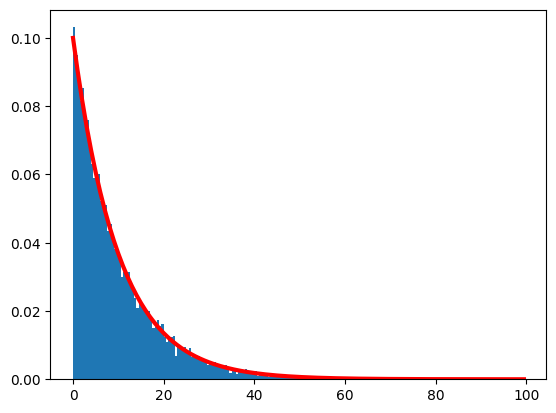

In [22]:
N = 100000

xmax = 60
ymax = xlambda

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(N):
    if(ry[i] <= xlambda*np.exp(-xlambda*rx[i])):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=xlambda*5
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

Random walk methods: the Metropolis algorithm
---------------------------------------------

Suppose that we want to generate random variables according to an
arbitrary probability density $P(x)$. The Metropolis algorithm produces
a “random walk” of points $\{x_i\}$ whose asymptotic probability
approaches $P(x)$ after a large number of steps. The random walk is
defined by a “transition probability” $w(x_i \rightarrow x_j)$ for one
value $x_i$ to another $x_j$ in order that the distribution of points
$x_0$, $x_1$, $x_2$, ... converges to $P(x)$. In can be shown that it is
sufficient (but not necessary) to satisfy the “detailed balance”
condition 
$p(x_i)w(x_i \rightarrow x_j) = p(x_j)w(x_j \rightarrow x_i).$
This relation dos not specify $w(x_i \rightarrow x_j)$
uniquely. A simple choice is
$$w(x_i \rightarrow x_j)=\min{\left[ 1,\frac{P(x_j)}{P(x_i)} \right] }.$$
This choice can be described by the following steps. Suppose that the
“random walker” is a position $x_n$. To generate $x_{n+1}$ we

1.  choose a trial position $x_t=x_n+\delta _n$ , where the $\delta _n$
    is a random number in the interval $[-\delta ,\delta]$.

2.  Calculate $w=P(x_t)/P(x_n)$.

3.  If $w \geq 1$ we accept the change and let $x_{n+1}=x_t$.

4.  If $w \leq 1$, generate a random number $r$.

5.  If $r \leq w$, accept the change and let $x_{n+1} = x_t$.

6.  If the trial change is not accepted, the let $x_{n+1}=x_n$.

It is necessary to sample a number of points of the random walk before
the asymptotic probability $P(x)$ is attained. How do we choose the
“step size” $\delta$? If $\delta$ is too large, only a small fraction of
changes will be accepted and the sampling will be inefficient. If
$\delta$ is too small, a large number will be accepted, but it would
take too long to sample $P(x)$ over the whole interval of interest.
Ideally, we want at least 1/3-1/2 of the trial steps to be accepted. We
also want to choose $x_0$ such that the distribution $\{x_i\}$ converges
to $P(x)$ as quickly as possible. An obvious choice is to begin the
random walk at the point where $P(x)$ is maximum.

### Exercise 9.1: The Gaussian distribution

1.  Use the Metropolis algorithm to generate a Gaussian distribution
    $P(x)=A \exp{(-x^2/2\sigma ^2)}$. Is the numerical value of the
    normalization constant $A$ relevant? Determine the qualitative
    dependence of the acceptance ratio and the equilibrium time on the
    maximum step size $\delta$. One possible criterion for equilibrium
    is that $\langle x^2
    \rangle \approx \sigma ^2$. For $\sigma = 1$, what is a reasonable
    choice of $\delta$? (choose $x_0 = 0$.)

2.  Plot the asymptotic probability distribution generated by the
    Metropolis algorithm.
    

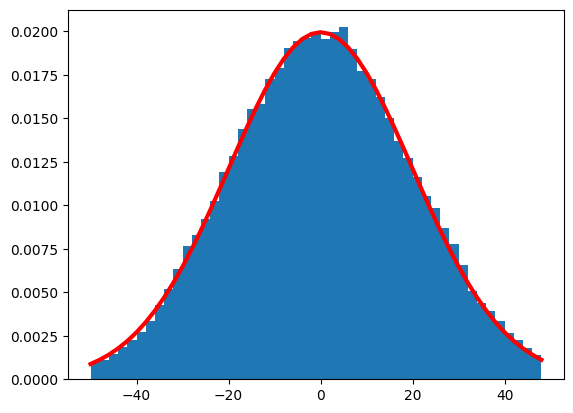

In [23]:
N = 100000

x = np.zeros(N)
delta = 2.
sigma = 20.
sigma2 = sigma**2

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
#    weight = np.exp(-0.5*(xtrial-xold)/sigma2)
#    if(xtrial < 0):
#        weight = 0

    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

xwalker = 20.
Nwarmup = 5
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)

x[0] = xwalker
tot = x[0]
for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)

binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

#### Challenge 9.2:

- Modify the code above to study the equilibration "time" for different step size $\delta$. 

- Analize the acceptance ratio in terms of $\delta$.

Monte Carlo integration
=======================

Imagine that we want to measure the area of a pond with arbitrary shape.
Suppose that this pond is in the middle of a field with known area $A$.
If we throw $N$ stones randomly, such that they land within the
boundaries of the field, and we count the number of stones that fall in
the pond $N_{in}$, the area of the pond will be approximately
proportional to the fraction of stones that make a splash, multiplied by
$A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example
of the “Monte Carlo” method.

Simple Monte Carlo integration
------------------------------

More generaly, imagine a rectangle of height $H$ in the integration
interval $[a,b]$, such that the function $f(x)$ is within its
boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that
they are uniformly distributed inside this rectangle. The fraction of
points that fall within the area contained below $f(x)$, <span>*i.
e.*</span>, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio o
fthe integral of $f(x)$ and the area of the rectangle. Hence, the
estimate of the integral will be given by:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).
$$

Another Monte Carlo procedure is based on the definition:
$\langle f \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.$
In order to determine this average, we sample the
value of $f(x)$:
$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$
where the
$N$ values $x_i$ are distributed unformly in the interval $[a,b]$. The
integral will be given by $$I(N)=(b-a) \langle f \rangle .$$

Monte Carlo error analysis
--------------------------

The Monte Carlo method clearly yields approximate results. The accuracy
deppends on the number of values $N$ that we use for the average. A
possible measure of the error is the “variance” $\sigma^2$ defined by:
$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2,$
where
$\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i)$ 
and
$\langle f^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)^2.$
The
“standard deviation” is $\sigma$. However, we should expect that the
error decreases with the number of points $N$, and the quantity $\sigma$
defines by (\[mc\_sigma\]) does not. Hence, this cannot be a good
measure of the error.

Imagine that we perform several measurements of the integral, each of
them yielding a result $I_n$. These values have been obtained with
different sequences of $N$ random numbers. According to the central
limit theorem, these values whould be normally dstributed around a mean
$\langle I
\rangle$. Suppouse that we have a set of $M$ of such measurements
${I_n}$. A convenient measure of the differences of these measurements
is the “standard deviation of the means” $\sigma_M$:
$\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,$
where
$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$
and
$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$
It can be proven that
$\sigma_M \approx \sigma/\sqrt{N}.$ 
This relation becomes exact in the limit of a very
large number of measurements. Note that this expression implies that the
error decreases with the square root of the number of trials, meaning
that if we want to reduce the error by a factor 10, we need 100 times
more points for the average.


(array([ 960., 1019., 1000.,  957.,  959., 1038., 1088.,  945., 1021.,
        1013.]),
 array([2.30638191e-05, 1.00014739e-01, 2.00006414e-01, 2.99998090e-01,
        3.99989765e-01, 4.99981440e-01, 5.99973116e-01, 6.99964791e-01,
        7.99956466e-01, 8.99948142e-01, 9.99939817e-01]),
 <BarContainer object of 10 artists>)

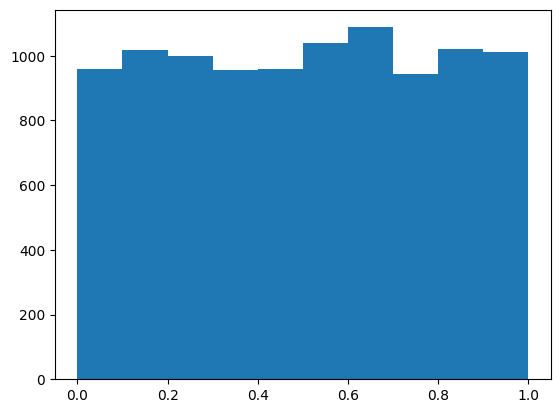

In [24]:
# simple example 

import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.random.random(10000))

In [25]:
samples = np.random.random(10000000)
x2 = samples**2
print(np.mean(x2))

0.3333388046282111



# Example: Gaussian moments
To illustrate some of the these ideas we will utilize some Gaussian integrals. We write the Gaussian distribution as 
$$
P(x) = \exp(-a x^2/2)
$$ 
up to a normalization factor that must be imposed. With this convention, the $2n$ moment is given by
$$
\langle x^{2n} \rangle = \frac{(2n-1)!!}{a^n}
$$ 
where $n!!$ is the double factorial $n(n-2)(n-4)\dots 1$ and $(2n-1)!!$ admits a graphical interpretation as the number of ways to connect $2n$ points in pairs. This relation is at the foundation of Feynman diagram combinatorics in quantum field theory.

We wish to demonstrate that we can do these moment calculations via Monte Carlo integration. We will pay particular attention to see convergence happening, and will also study "negative moments" which are divergent integrals; clearly Monte Carlo integration won't work in that case.


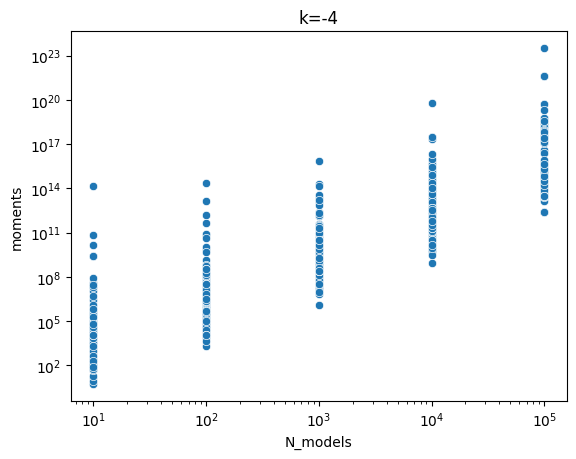

            k       moments
N_models                   
10       -4.0  1.354248e+12
100      -4.0  2.526564e+12
1000     -4.0  7.883004e+13
10000    -4.0  6.434034e+17
100000   -4.0  3.291866e+21


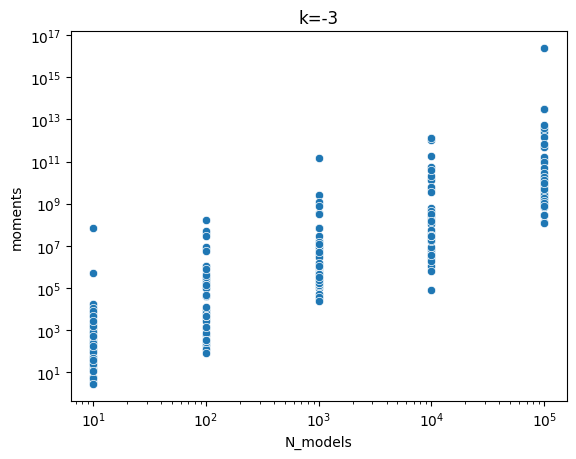

            k       moments
N_models                   
10       -3.0 -2.227775e+08
100      -3.0 -2.146606e+08
1000     -3.0  1.194477e+09
10000    -3.0 -6.739228e+11
100000   -3.0  2.224945e+14


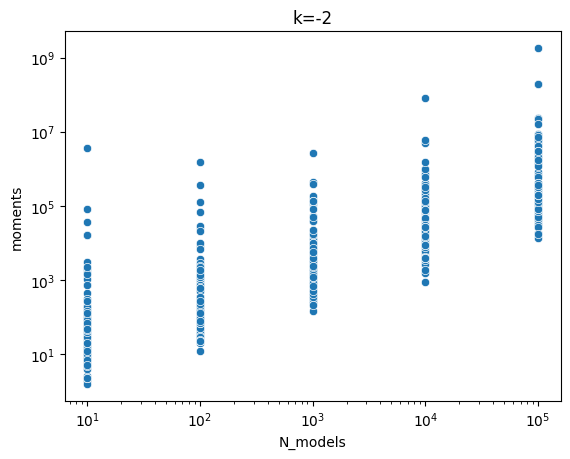

            k       moments
N_models                   
10       -2.0  3.846629e+04
100      -2.0  2.253533e+04
1000     -2.0  5.323280e+04
10000    -2.0  1.082260e+06
100000   -2.0  2.355690e+07


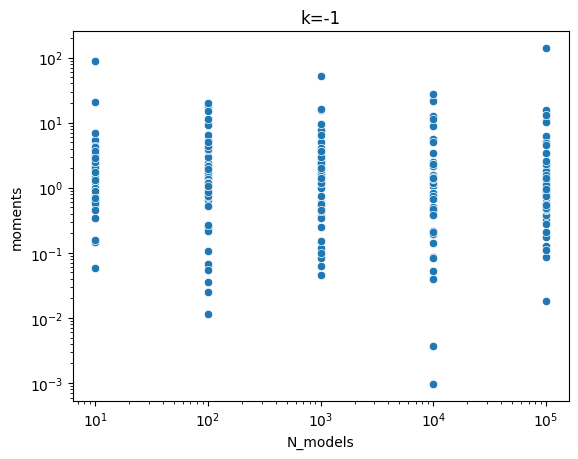

            k   moments
N_models               
10       -1.0 -7.224444
100      -1.0 -1.411081
1000     -1.0 -0.036416
10000    -1.0 -0.429084
100000   -1.0  0.532991


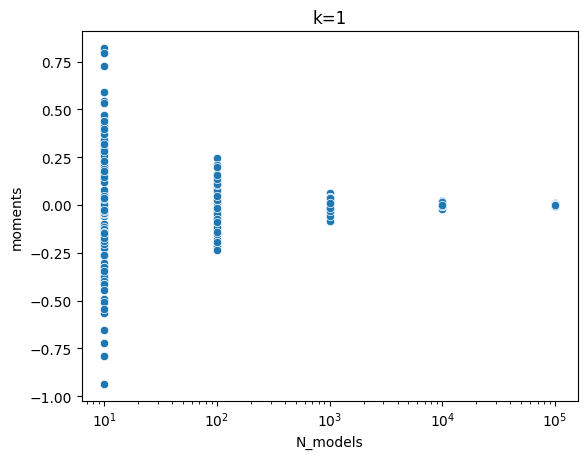

            k   moments
N_models               
10        1.0 -0.002581
100       1.0 -0.002605
1000      1.0 -0.001721
10000     1.0  0.000157
100000    1.0  0.000101


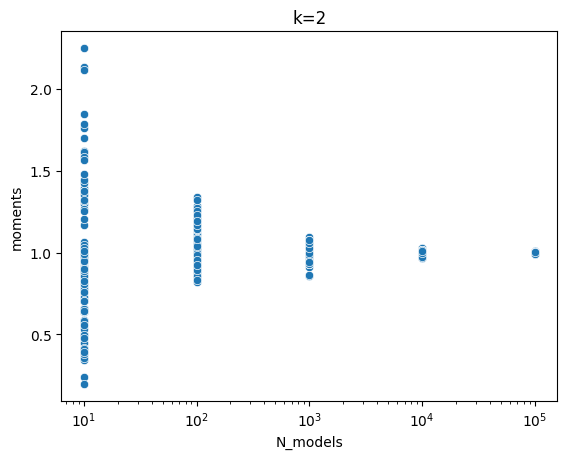

            k   moments
N_models               
10        2.0  0.968409
100       2.0  1.024082
1000      2.0  1.003782
10000     2.0  0.997774
100000    2.0  1.000313


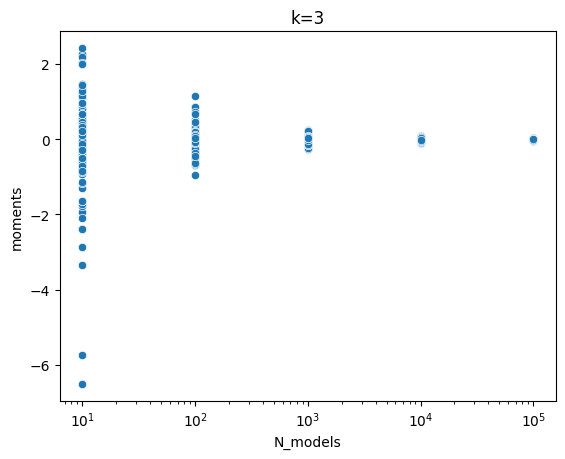

            k   moments
N_models               
10        3.0 -0.152931
100       3.0  0.000173
1000      3.0  0.000746
10000     3.0 -0.003220
100000    3.0 -0.001451


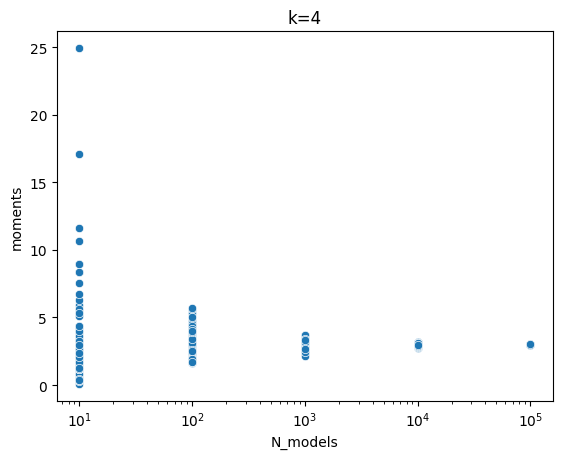

            k   moments
N_models               
10        4.0  2.997355
100       4.0  3.093216
1000      4.0  3.015365
10000     4.0  2.983398
100000    4.0  3.001397


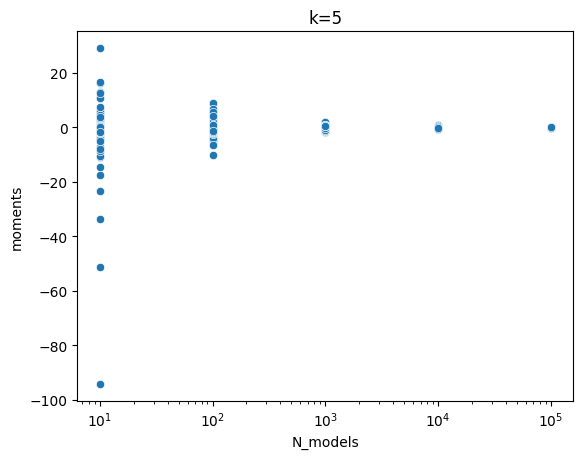

            k   moments
N_models               
10        5.0 -1.542387
100       5.0  0.152194
1000      5.0  0.110530
10000     5.0 -0.036169
100000    5.0 -0.016760


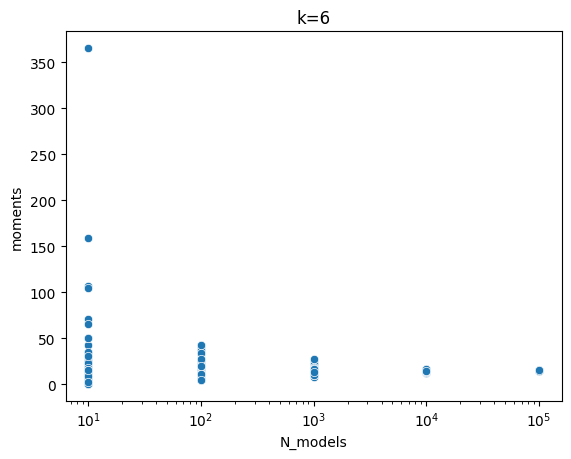

            k    moments
N_models                
10        6.0  16.925942
100       6.0  15.078264
1000      6.0  14.994150
10000     6.0  14.852016
100000    6.0  15.015007


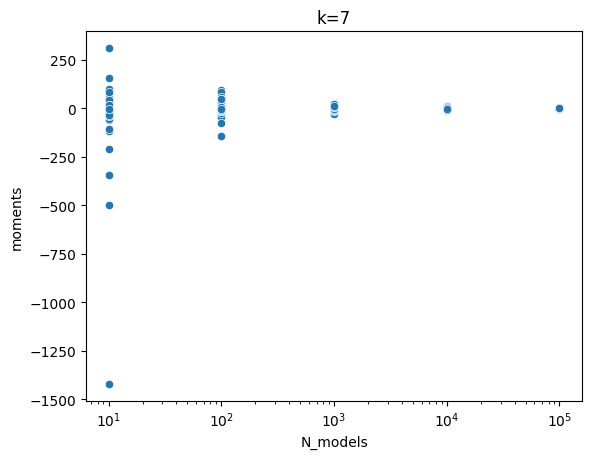

            k    moments
N_models                
10        7.0 -19.370876
100       7.0   1.828907
1000      7.0   1.940722
10000     7.0  -0.534640
100000    7.0  -0.194240


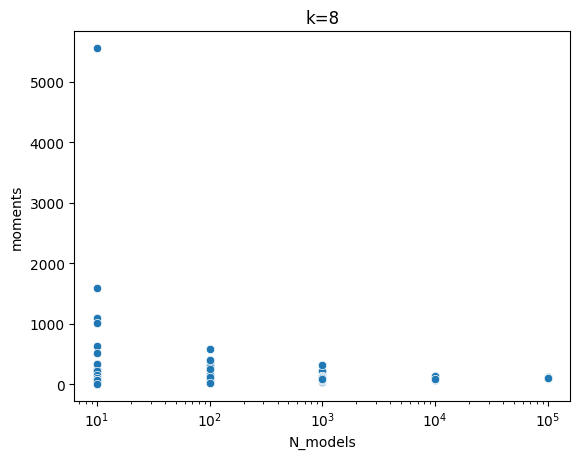

            k     moments
N_models                 
10        8.0  142.348768
100       8.0   98.603474
1000      8.0  103.325226
10000     8.0  103.234539
100000    8.0  105.135871


In [26]:
import jax.numpy as jnp
import jax.random as random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# set up method for computing moments
N_exps, N_modelss = 100, [10**k for k in range(1,6)]

def kth_gaussian_moments(k, N_models, N_exps):
    key = random.PRNGKey(0)
    draws = random.normal(key,shape=(N_exps,N_models))
    draws_k = draws**k
    return jnp.mean(draws_k,axis=1), jnp.std(draws_k,axis=1)

# compute moments and store the data
data_dict = {'k':[], 'N_models':[], 'moments': []}
for N_models in N_modelss:
    for k in [-4,-3,-2,-1] + list(range(1,9)):
        draws, stds = kth_gaussian_moments(k,N_models,N_exps)
        data_dict['moments'].extend(draws)
        data_dict['k'].extend([k]*N_exps)
        data_dict['N_models'].extend([N_models]*N_exps)
        
data_dict['moments'] = [float(k) for k in data_dict['moments']]

data = pd.DataFrame(data_dict)

# plot the data and demonstrate convergence
for k in [-4,-3,-2,-1] + list(range(1,9)):
    sns.scatterplot(x='N_models',y='moments',data=data[data['k']==k])
    if k < 0: 
        plt.yscale('log')
    plt.xscale('log')
    plt.title(f'k={k}')
    plt.show()

    mean_of_moments_largest_models = data[data['k']==k].groupby('N_models').mean()
    print(mean_of_moments_largest_models)

Variance reduction
------------------

If the function being integrated does not fluctuate too much in the
interval of integration, and does not differ much from the average
value, then the standard Monte Carlo mean-value method should work well
with a reasonable number of points. Otherwise, we will find that the
variance is very large, meaning that some points will make small
contributions, while others will make large contributions to the
integral. If this is the case, the algorithm will be very inefficient.
The method can be improved by splitting the function $f(x)$ in two
$f(x)=f_1(x)+f_2(x)$, such that the integral of $f_1(x)$ is known, and
$f_2(x)$ as a small variance. The “variance reduction” technique,
consists then in evaluating the integral of $f_2(x)$ to obtain:
$$\int _a^b{f(x)dx}=\int _a^b {f_1(x)dx} + \int _a^b{f_2(x)dx} = \int
_a^b{f_1(x)dx}+J.$$

Importance Sampling
-------------------

Imagine that we want to sample the function $f(x)=e^{-x^2}$ in the
interval $[0,1]$. It is evident that most of our points will fall in the
region where the value of $f(x)$ is very small, and therefore we will
need a large number of values to achieve a decent accuracy. A way to
improve the measurement by reducing the variance is obtained by
“importance sampling”. As the name says, the idea is to sample the
regions with larger contributions to the integral. For this goal, we
introduce a probability distribution $P(x)$ normalized in the interval
of integration $$\int _a^b{P(x)dx} = 1.$$ Then, we can rewrite the
integral of $f(x)$ as 
$I=\int _a^b{\frac{f(x)}{P(x)}P(x)dx}$
We can evaluate this integral, by sampling
according to the probability distribution $P(x)$ and evaluating the sum
$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{P(x_i)}.$
Note that for the uniform case $P(x)=1/(b-a)$, the
expression reduces to the simple Monte Carlo integral.

We are free to choose $P(x)$ now. We wish to do it in a way to reduce
and minimize the variance of the integrand $f(x)/P(x)$. The way to to
this is picking a $P(x)$ that mimics $f(x)$ where $f(x)$ is large. if we
are able to determine an apropiate $P(x)$, the integrand will be slowly
varying, and hence the variance will be reduced. Another consideration
is that the generation of points according to the distribution $P(x)$
should be a simple task. As an example, let us consider again the
integral 
$I=\int _0^1 {e^{-x^2}dx}.$
A reasonable choice for a weigh
function is $P(x)=Ae^{-x}$, where $A$ is a normalization constant.

Notice that for $P(x)=f(x)$ the variance is zero! This is known as the
zero variance property. There is a catch, though: The probability function
$P(x)$ needs to be normalized, implying that in reality, $P(x)=f(x)/\int f(x)dx$, which
assumes that we know in advance precisely the integral that we are trying to calculate!

### Exercise 10.3: Importance sampling 

1.  Choose the weight function $P(x)=e^{-x}$ and evaluate the integral:
    $\int _0^{\infty} {x^{3/2}e^{-x}dx}.$

2.  Choose $P(x)=e^{-ax}$ and estimate the integral
    $\int _0^{\pi} \frac{dx}{x^2+\cos ^2{x}}.$
    Determine the value of
    $a$ that minimizes the variance of the integral.



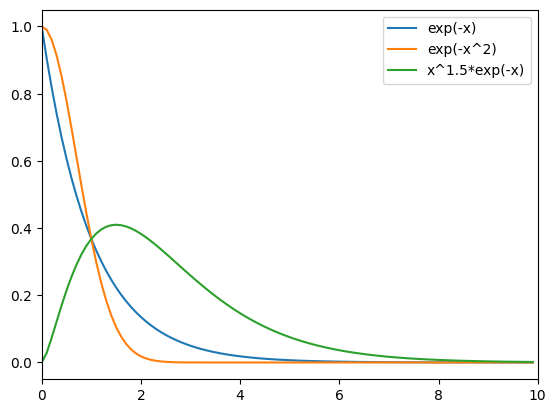

In [27]:
# start by seeing which P(x)'s we know how to sample from better mimic integral at large $x$
pyplot.xlim(0,10)
x = np.arange(0,10,0.1)
pyplot.plot(x,np.exp(-x), label='exp(-x)');
pyplot.plot(x,np.exp(-x**2), label='exp(-x^2)');
pyplot.plot(x,x**1.5*np.exp(-x), label='x^1.5*exp(-x)');
plt.legend()

In [28]:
r

array([0.60447043, 0.71203661, 0.05687354, ..., 0.54616827, 0.46752904,
       0.42861534], shape=(10000,))

In [29]:
# Trapezoidal integration
def trapezoids(func, xmin, xmax, nmax):
    h = (xmax - xmin) / nmax
    Isim = (func(xmin) + func(xmax)) / 2  # Average the function values at the endpoints
    
    for i in range(1, nmax):
        x = xmin + i * h
        Isim += func(x)  # Sum up the function values at the interior points
    
    Isim *= h  # Multiply by the width of each trapezoid to get the integral approximation
    return Isim

def f(x):
    return x**1.5*np.exp(-x)
    
print("Trapezoids: ", trapezoids(f, 0., 20., 100000))


Trapezoids:  1.3293401896452883


In [30]:

# Simple Monte Carlo integration
n0 = 1000000
simple_mc_samples = np.random.random(n0) * 10

Itot = np.sum(simple_mc_samples**1.5*np.exp(-simple_mc_samples))
print("Simple Monte Carlo: ", Itot/n0)

exp_samples = -np.log(np.random.random(n0)) # converts uniform samples to exponential samples, did last class
Itot = np.sum(exp_samples**1.5) # integrand is now x^1.5
print("Importance Sampling: ", Itot/n0)

Simple Monte Carlo:  0.1325040517842783
Importance Sampling:  1.3273716202880488


On to the next example

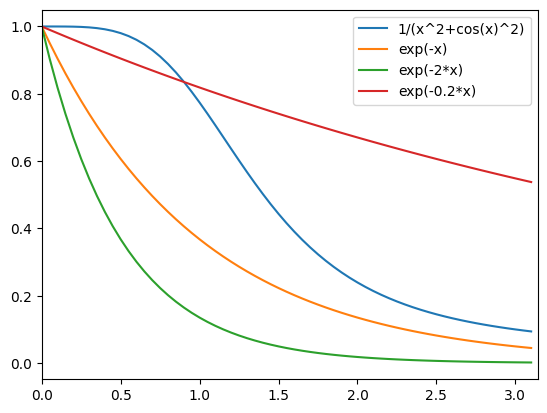

In [31]:
pyplot.xlim(0,np.pi)
x = np.arange(0,np.pi,0.05)
pyplot.plot(x,1./(x**2+np.cos(x)**2), label='1/(x^2+cos(x)^2)');
pyplot.plot(x,np.exp(-x), label='exp(-x)');
pyplot.plot(x,np.exp(-2*x), label='exp(-2*x)');
pyplot.plot(x,np.exp(-0.2*x), label='exp(-0.2*x)');
plt.legend()

Trapezoids:  1.5811879708476726
Simple Monte Carlo:  1.5862195882809955
Importance Sampling:
0.100 1.516 0.010
0.200 1.507 0.007
0.300 1.495 0.005
0.400 1.502 0.004
0.500 1.516 0.003
0.600 1.538 0.003
0.700 1.560 0.002
0.800 1.578 0.002
0.900 1.583 0.001
1.000 1.574 0.002
1.100 1.546 0.002
1.200 1.500 0.003
1.300 1.439 0.003
1.400 1.368 0.004
1.500 1.289 0.004
1.600 1.208 0.004
1.700 1.128 0.004
1.800 1.051 0.004
1.900 0.978 0.004
2.000 0.911 0.004


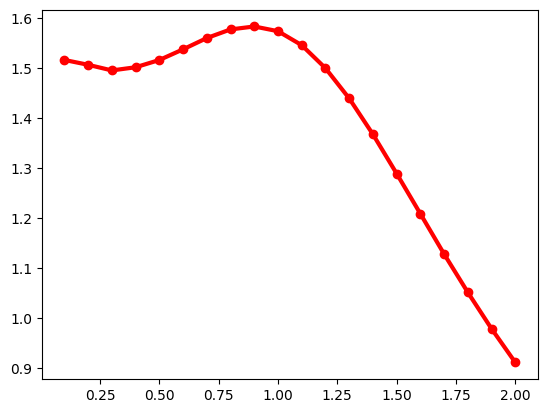

In [32]:
# Trapezoidal integration

def g(x):
    return 1./(x**2+np.cos(x)**2)

print("Trapezoids: ", trapezoids(g, 0., np.pi, 1000000))

# Simple Monte Carlo integration
n0 = 100000
a = np.arange(0.1,2.1,0.1)
I = np.arange(0.1,2.1,0.1)

r = np.random.random(n0)

I0 = np.sum(1./((r*np.pi)**2+np.cos(r*np.pi)**2))
print("Simple Monte Carlo: ", I0/n0*np.pi)

# Importance Sampling
print("Importance Sampling:")
x = -np.log(r)
              
i = 0
for ai in a:
    norm = (1.-np.exp(-ai*np.pi))/ai
    x1 = norm*x/ai
    Itot = 0.
    Nin = 0
    I2 = 0.
    for xi in x1:
        if(xi <= np.pi):
            Nin += 1
            Itot += g(xi)*np.exp(xi*ai)
            I2 += (g(xi)*np.exp(xi*ai))**2

    Itot *= norm
    I2 *= norm

    I[i] = Itot/Nin
    i += 1
    print(f'{ai:.3f}', f'{Itot/Nin:.3f}', f'{np.sqrt(abs(Itot**2/Nin**2 - I2/Nin))/np.sqrt(Nin):.3f}')

    
pyplot.plot(a,I,ls='-',marker='o',c='red',lw=3);


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function we want to integrate
def f(x):
    return np.exp(-x**2)

# Define the interval
a, b = -10,10

# 1. Trapezoidal rule
def trapezoidal_rule(f, a, b, n=1000):
    x = np.linspace(a, b, n)
    y = f(x)
    dx = (b - a) / (n - 1)
    return np.trapezoid(y, dx=dx)

# 2. Importance sampling with a Gaussian proposal distribution
def importance_sampling(f, n=1000):
    # Sample from a Gaussian centered at 0 with std=1
    samples = np.random.normal(loc=0, scale=1, size=n)
    weights = f(samples) / (1/np.sqrt(2 * np.pi) * np.exp(-samples**2 / 2))
    return np.mean(weights)

# 3. Monte Carlo integration using a uniform distribution
def monte_carlo_uniform(f, a, b, n=1000):
    # Sample uniformly in the interval [a, b]
    samples = np.random.uniform(a, b, n)
    # Calculate the mean of the function values at the sampled points
    avg_value = np.mean(f(samples))
    # Scale by the interval width
    return (b - a) * avg_value

# Calculate the integrals
trap_result = trapezoidal_rule(f, a, b)
importance_result = importance_sampling(f)
monte_carlo_result = monte_carlo_uniform(f, a, b)

# Output results
print(f"Trapezoidal Rule Result: {trap_result}")
print(f"Importance Sampling Result: {importance_result}")
print(f"Monte Carlo (Uniform) Result: {monte_carlo_result}")



Trapezoidal Rule Result: 1.7724538509055163
Importance Sampling Result: 1.7925957817106277
Monte Carlo (Uniform) Result: 1.8458805049667744


Ground Truth: 1.7724538509055159


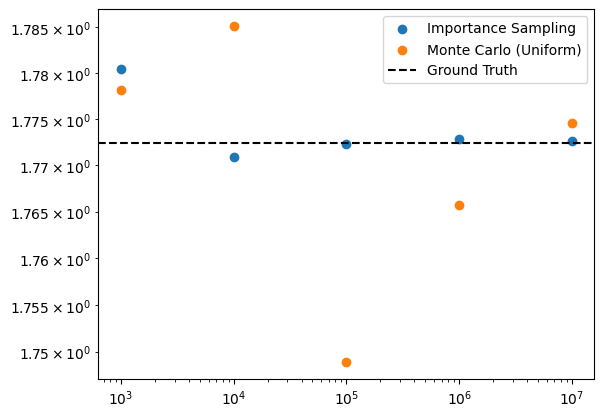

In [34]:
ground_truth = trapezoidal_rule(f, a, b, n=100000000)
print(f"Ground Truth: {ground_truth}")

imp, mc = [], []
ns = [10**k for k in range(3,8)]
for n in ns:
    imp.append(importance_sampling(f, n))
    mc.append(monte_carlo_uniform(f, a, b, n))

plt.scatter(ns, imp, label='Importance Sampling')
plt.scatter(ns, mc, label='Monte Carlo (Uniform)')
plt.axhline(ground_truth, color='k', linestyle='--', label='Ground Truth')
plt.legend()
plt.yscale('log')
plt.xscale('log')

### Exercise 10.4: The Metropolis algorithm 

Use the Metropolis algorithm to sample points according to a ditribution
and estimate the integral $$\int _0^4 {x^2e^{-x}dx},$$ with
$P(x)=e^{-x}$ for $0 \leq x \leq 4$. Plot the number of times the
walker is at points $x_0$, $x_1$, $x_2$, ... Is the integrand sampled
uniformly? If not, what is the approximate region of $x$ where the
integrand is sampled more often?

Trapezoids:  1.5237933888733828
Metropolis:  1.5154038090440969


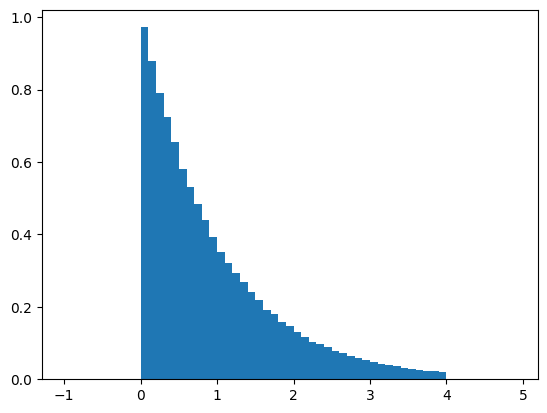

In [35]:
delta = 2
xmin = 0.
xmax = 4.

def f(x):
    return x**2*np.exp(-x)

def P(x):
    global xmin, xmax
    if(x < xmin or x > xmax):
        return 0.
    return np.exp(-x)


def metropolis(xold):
    global delta
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = P(xtrial)/P(xold)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


xwalker = (xmax+xmin)/2.
for i in range(100000):
    xwalker = metropolis(xwalker)

I0 = 0.
N = 300000

x = np.zeros(N)

x[0] = xwalker
for i in range(1,N):
    for j in range(20):
        xwalker = metropolis(xwalker)
    x[i] = xwalker
    I0 += x[i]**2

binwidth=0.1
pyplot.hist(x,bins=np.arange(xmin-1, xmax+1, 0.1),density=True);

print("Trapezoids: ", trapezoids(f,xmin,xmax,100000))
print("Metropolis: ", I0*(1.-np.exp(-4.))/N)

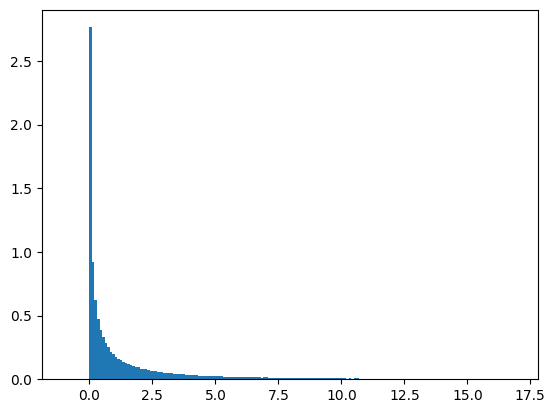

In [36]:
pyplot.hist(x**2,bins=np.arange(xmin**2-1, xmax**2+1, 0.1),density=True);



#### Challenge 10.1

- Calculate the integral $\int_0^1 x^2 dx=1/3$ using simple MC integration and importance sampling with $P(x)=x$.

- Calculate the integral $\int_0^1 \sqrt{x}dx=2/3$ using simple MC integration and $P(x)=1-e^{-ax}$. Find the values of $a$ that minimizes the variance.